In [1]:
from xmip.preprocessing import combined_preprocessing
from xmip.utils import google_cmip_col
from xmip.postprocessing import match_metrics
import matplotlib.pyplot as plt
import xarray as xr

In [51]:
#NA No-Area
#PP xmip preprocessing error
models = [
#allzeros 'GFDL-CM4',
 'IPSL-CM6A-LR',
 'MIROC6',
#PP 'CESM2-WACCM',
#PP 'CESM2',
 'SAM0-UNICON',
 'CanESM5',
 'MPI-ESM-1-2-HAM',
#NA 'NESM3',
#NA 'CAMS-CSM1-0',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'GFDL-ESM4',
 'NorESM2-LM',
 'MRI-ESM2-0',
#NA is a mask, not area 'FGOALS-f3-L',
 'NorESM2-MM',
#PP 'CESM2-WACCM-FV2',
#PP 'CESM2-FV2',
 'FIO-ESM-2-0',
#PP 'AWI-ESM-1-1-LR',
#NA 'BCC-CSM2-MR',
#NA 'BCC-ESM1',
#PP 'CIESM',
 'CMCC-CM2-SR5',
 'EC-Earth3-AerChem',
 'TaiESM1',
 'NorCPM1',
 'IPSL-CM5A2-INCA',
 'ACCESS-ESM1-5',
 'ACCESS-CM2',
 'CMCC-CM2-HR4',
 'EC-Earth3',
 'EC-Earth3-Veg-LR',
 'EC-Earth3-Veg',
 'CAS-ESM2-0',
#NA is a mask, not area 'FGOALS-g3',
 'EC-Earth3-CC',
 'CMCC-ESM2',
# 'ICON-ESM-LR',
 'IPSL-CM6A-LR-INCA']

In [3]:
cmip6 = google_cmip_col()

In [ ]:
#extract from the catalogue SIC and cell area
cat = cmip6.search(
    source_id=models,
    variable_id='siconc', 
    table_id='SImon',
    experiment_id='historical',
    member_id='r1i1p1f1',
    grid_label='gn'
)
ddict = cat.to_dataset_dict(
    preprocess=combined_preprocessing,
    xarray_open_kwargs={'use_cftime':True},
)

cat = cmip6.search(
    source_id=models,
    variable_id='areacello', 
    table_id='Ofx',
    experiment_id='historical',
    member_id='r1i1p1f1',
    grid_label='gn'
)
ddict_area = cat.to_dataset_dict(
    preprocess=combined_preprocessing,
    xarray_open_kwargs={'use_cftime':True},
)

In [55]:
mlist = list(ddict.keys())
print(len(mlist))
mlist

32


['CMIP.EC-Earth-Consortium.EC-Earth3-AerChem.historical.SImon.gn',
 'CMIP.CMCC.CMCC-ESM2.historical.SImon.gn',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.SImon.gn',
 'CMIP.CAS.CAS-ESM2-0.historical.SImon.gn',
 'CMIP.IPSL.IPSL-CM5A2-INCA.historical.SImon.gn',
 'CMIP.BCC.BCC-ESM1.historical.SImon.gn',
 'CMIP.SNU.SAM0-UNICON.historical.SImon.gn',
 'CMIP.MIROC.MIROC6.historical.SImon.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3.historical.SImon.gn',
 'CMIP.CSIRO.ACCESS-ESM1-5.historical.SImon.gn',
 'CMIP.NCC.NorESM2-LM.historical.SImon.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-CC.historical.SImon.gn',
 'CMIP.CCCma.CanESM5.historical.SImon.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.historical.SImon.gn',
 'CMIP.IPSL.IPSL-CM6A-LR-INCA.historical.SImon.gn',
 'CMIP.NUIST.NESM3.historical.SImon.gn',
 'CMIP.MRI.MRI-ESM2-0.historical.SImon.gn',
 'CMIP.CAMS.CAMS-CSM1-0.historical.SImon.gn',
 'CMIP.CMCC.CMCC-CM2-SR5.historical.SImon.gn',
 'CMIP.NCC.NorCPM1.historical.SImon.gn',
 'CMIP.FIO-QLNM.FIO-ESM-2

In [49]:
alist = list(ddict_area.keys())
print(len(alist))
alist

28


['CMIP.IPSL.IPSL-CM6A-LR.historical.Ofx.gn',
 'CMIP.IPSL.IPSL-CM5A2-INCA.historical.Ofx.gn',
 'CMIP.IPSL.IPSL-CM6A-LR-INCA.historical.Ofx.gn',
 'CMIP.CAS.FGOALS-f3-L.historical.Ofx.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.historical.Ofx.gn',
 'CMIP.CCCma.CanESM5.historical.Ofx.gn',
 'CMIP.CMCC.CMCC-CM2-SR5.historical.Ofx.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-AerChem.historical.Ofx.gn',
 'CMIP.SNU.SAM0-UNICON.historical.Ofx.gn',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Ofx.gn',
 'CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.Ofx.gn',
 'CMIP.MPI-M.MPI-ESM1-2-LR.historical.Ofx.gn',
 'CMIP.MIROC.MIROC6.historical.Ofx.gn',
 'CMIP.NCC.NorESM2-LM.historical.Ofx.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3.historical.Ofx.gn',
 'CMIP.AS-RCEC.TaiESM1.historical.Ofx.gn',
 'CMIP.FIO-QLNM.FIO-ESM-2-0.historical.Ofx.gn',
 'CMIP.CAS.FGOALS-g3.historical.Ofx.gn',
 'CMIP.CAS.CAS-ESM2-0.historical.Ofx.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3-CC.historical.Ofx.gn',
 'CMIP.MRI.MRI-ESM2-0.historical.Ofx.g

In [56]:
# combine cell area with SIC. This removes issues with broadcasting when calculating SIE
ddict_w_area = match_metrics(ddict, ddict_area, 'areacello', dim_length_conflict='align')

/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/postprocessing.py:593: UserWarning: CMIP.NCC.NorESM2-LM.historical.r1i1p1f1.SImon.gn.none.siconc:`metric` dimensions ['y:385'] do not match `ds` ['y:384']. Aligning the data on `inner`
  warnings.warn(msg + " Aligning the data on `inner`")
/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/postprocessing.py:593: UserWarning: CMIP.CMCC.CMCC-ESM2.historical.r1i1p1f1.SImon.gn.none.siconc:`metric` dimensions ['x:292', 'y:362'] do not match `ds` ['x:291', 'y:360']. Aligning the data on `inner`
  warnings.warn(msg + " Aligning the data on `inner`")
/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/postprocessing.py:593: UserWarning: CMIP.NCC.NorESM2-MM.historical.r1i1p1f1.SImon.gn.none.siconc:`metric` dimensions ['y:385'] do not match `ds` ['y:384']. Aligning the data on `inner`
  warnings.warn(msg + " Aligning the data on `inner`")
/srv/conda/envs/notebook/lib/python3.11/site-packages/xmip/postprocessing.py:593: Use

In [57]:
# check if all models have areacello (sanity check) 
for name, ds in ddict_w_area.items():
    print(name)
    try:
        print(ds.areacello.shape)
    except:
        print(name+' has no areacello')

CMIP.NCC.NorESM2-LM.historical.SImon.gn
(1, 1, 384, 360)
CMIP.EC-Earth-Consortium.EC-Earth3.historical.SImon.gn
(1, 1, 292, 362)
CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.historical.SImon.gn
(1, 1, 220, 256)
CMIP.MIROC.MIROC6.historical.SImon.gn
(1, 1, 256, 360)
CMIP.MRI.MRI-ESM2-0.historical.SImon.gn
(1, 1, 363, 360)
CMIP.CMCC.CMCC-ESM2.historical.SImon.gn
(1, 1, 291, 360)
CMIP.EC-Earth-Consortium.EC-Earth3-AerChem.historical.SImon.gn
(1, 1, 292, 362)
CMIP.CAS.CAS-ESM2-0.historical.SImon.gn
(1, 1, 196, 360)
CMIP.NCC.NorESM2-MM.historical.SImon.gn
(1, 1, 384, 360)
CMIP.IPSL.IPSL-CM6A-LR.historical.SImon.gn
(1, 1, 332, 362)
CMIP.FIO-QLNM.FIO-ESM-2-0.historical.SImon.gn
(1, 1, 384, 320)
CMIP.IPSL.IPSL-CM5A2-INCA.historical.SImon.gn
(1, 1, 149, 182)
CMIP.NCC.NorCPM1.historical.SImon.gn
(1, 1, 384, 320)
CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.SImon.gn
(1, 1, 300, 360)
CMIP.CMCC.CMCC-CM2-SR5.historical.SImon.gn
(1, 1, 291, 360)
CMIP.CAS.FGOALS-g3.historical.SImon.gn
(1, 1, 218, 360)
CMIP.CSIRO

In [58]:
# create an empty pandas DF
import pandas as pd
times = pd.date_range(start='1850-01',end='2014-12',freq='MS')+ pd.DateOffset(days=14)
df_sie = pd.DataFrame(index=times)
df_sie

""
1850-01-15
1850-02-15
1850-03-15
1850-04-15
1850-05-15
...
2014-08-15
2014-09-15
2014-10-15
2014-11-15


In [59]:
for name, ds in ddict_w_area.items():
    print(name)
    extent = ds.siconc.where(ds.siconc>=15.).squeeze()
    area = ds.areacello.where(ds.lat<-40.).squeeze()
    extent = extent*area/extent*1.e-12 # scale to million km2
    sie = extent.sum(dim=['x','y'],skipna=True)
    print(sie.shape)
    #sie.to_netcdf(model.attrs['source_id'])
    mname = ds.attrs['source_id']
    df_sie[mname] = sie.values

CMIP.NCC.NorESM2-LM.historical.SImon.gn
(1980,)
CMIP.EC-Earth-Consortium.EC-Earth3.historical.SImon.gn
(1980,)
CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.historical.SImon.gn
(1980,)
CMIP.MIROC.MIROC6.historical.SImon.gn
(1980,)
CMIP.MRI.MRI-ESM2-0.historical.SImon.gn
(1980,)
CMIP.CMCC.CMCC-ESM2.historical.SImon.gn
(1980,)
CMIP.EC-Earth-Consortium.EC-Earth3-AerChem.historical.SImon.gn
(1980,)
CMIP.CAS.CAS-ESM2-0.historical.SImon.gn
(1980,)
CMIP.NCC.NorESM2-MM.historical.SImon.gn
(1980,)
CMIP.IPSL.IPSL-CM6A-LR.historical.SImon.gn
(1980,)
CMIP.FIO-QLNM.FIO-ESM-2-0.historical.SImon.gn
(1980,)
CMIP.IPSL.IPSL-CM5A2-INCA.historical.SImon.gn
(1980,)
CMIP.NCC.NorCPM1.historical.SImon.gn
(1980,)
CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.SImon.gn
(1980,)
CMIP.CMCC.CMCC-CM2-SR5.historical.SImon.gn
(1980,)
CMIP.CAS.FGOALS-g3.historical.SImon.gn
(1980,)
CMIP.CSIRO.ACCESS-ESM1-5.historical.SImon.gn
(1980,)
CMIP.MPI-M.MPI-ESM1-2-HR.historical.SImon.gn
(1980,)
CMIP.CAS.FGOALS-f3-L.historical.SImon.gn
(1980,)

In [75]:
# sort the order and save to csv
df_sie = df_sie.reindex(sorted(df_sie.columns), axis=1)
df_sie = df_sie.drop(columns=['FGOALS-g3','FGOALS-f3-L']) # noarea
df_sie.to_csv('CMIP6-26_SIE_m_18500115-20141215.csv')

In [ ]:
model = ddict_w_area['CMIP.IPSL.IPSL-CM6A-LR.historical.SImon.gn']
extent = model.siconc.where(model.siconc>=15).squeeze()
area = model.areacello.where(model.lat<-40.).squeeze()
extent = extent*area/extent*1.e-12 # scale to million km2
sie = extent.sum(dim=['x','y'],skipna=True)
print(sie.shape)
sie.plot()
plt.title(model.attrs['source_id'])

(1980,)


(165,)


Text(0.5, 1.0, 'CMCC-CM2-HR4')

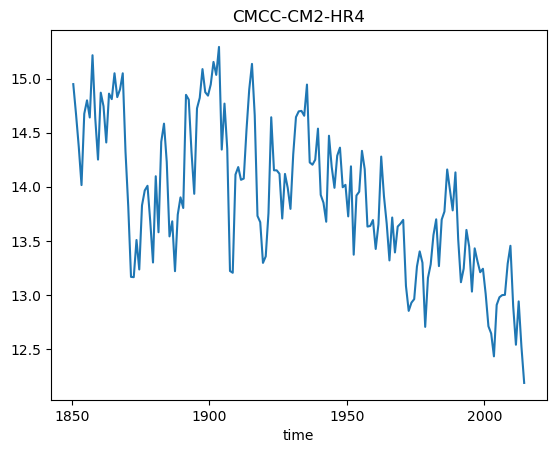

In [23]:
model = ddict_w_area['CMIP.CMCC.CMCC-CM2-HR4.historical.SImon.gn']
extent = model.siconc.where(model.siconc>=15).squeeze()
area = model.areacello.where(model.lat<-40.).squeeze()
extent = extent*area/extent*1.e-12 # scale to million km2
sie = extent.sum(dim=['x','y'],skipna=True).coarsen(time=12).mean()
print(sie.shape)
sie.plot()
plt.title(model.attrs['source_id'])

In [29]:
ds = xr.Dataset(coords={'time':sie.time.values})
mname = model.attrs['source_id']
ds[mname] = sie.values
ds


KeyboardInterrupt



(1980, 218, 360)


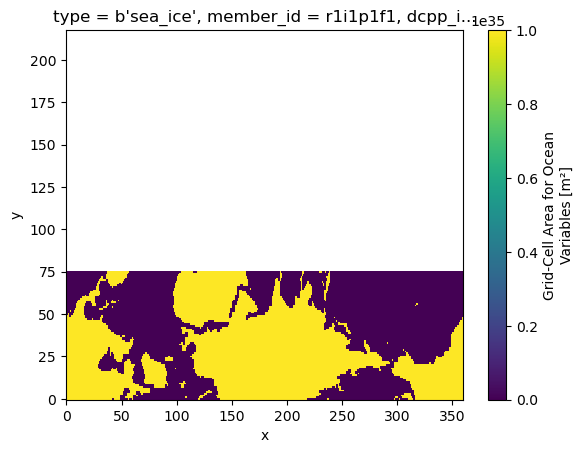

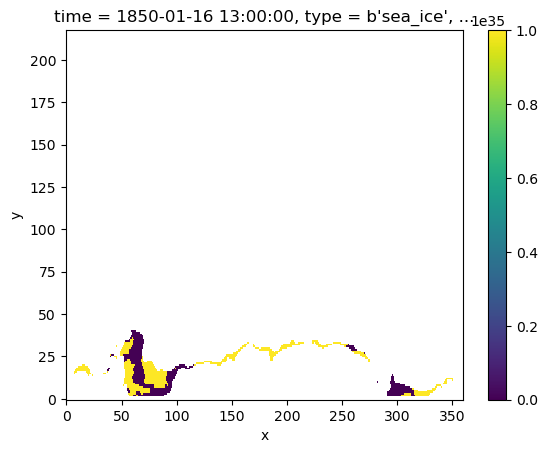

In [66]:
model = ddict_w_area['CMIP.CAS.FGOALS-f3-L.historical.SImon.gn']
extent = model.siconc.where(model.siconc>=15).squeeze()
area = model.areacello.where(model.lat<-40.).squeeze()
sie = extent*area/extent
print(sie.shape)
plt.figure()
area.plot()
plt.figure()
sie.isel(time=0).plot()

(1980, 332, 362)


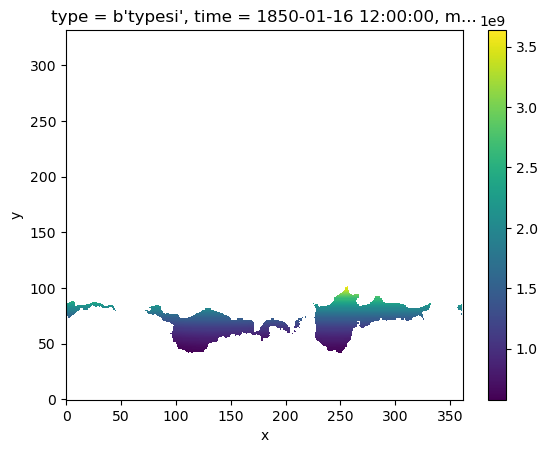

In [10]:
model = ddict_w_area['CMIP.IPSL.IPSL-CM6A-LR.historical.SImon.gn']
extent = model.siconc.where(model.siconc>=15).squeeze()
area = model.areacello.where(model.lat<-40.).squeeze()
sie = extent*area/extent
print(sie.shape)
sie.isel(time=0).plot()

(1980, 1050, 1440)


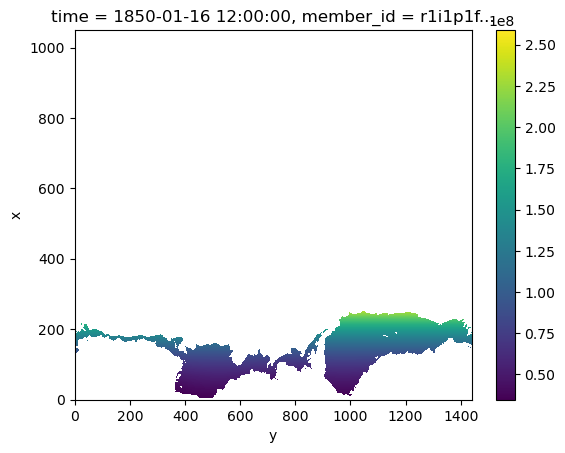

In [9]:
model = ddict_w_area['CMIP.CMCC.CMCC-CM2-HR4.historical.SImon.gn']
extent = model.siconc.where(model.siconc>=15).squeeze()
# dask arrays do not support where assignment:
# extent = model.siconc.where(model.siconc>=15,1,0).squeeze()
area = model.areacello.where(model.lat<-40.).squeeze()
sie = extent*area/extent
print(sie.shape)
sie.isel(time=0).plot()